In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:

file1 = pd.read_csv('marketing_customer_analysis.csv')
print(type(file1))
      

<class 'pandas.core.frame.DataFrame'>


In [4]:
file1.shape

(9134, 24)

In [5]:
column_names = file1.columns

In [6]:
cols = []
for colname in file1.columns:
    cols.append(colname.lower().replace(' ','_'))

file1.columns = cols

display(file1.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
file1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
display(file1.tail())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [10]:
file1.columns[16].lower()

'number_of_policies'

In [11]:
column_names.shape

(24,)

In [12]:
file1.index

RangeIndex(start=0, stop=9134, step=1)

In [13]:
file1.reset_index()

,index,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [14]:
file1 = file1.reset_index(drop = True)

In [15]:
file1.index

RangeIndex(start=0, stop=9134, step=1)

In [16]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
file1[['state']] 

,state
0,Washington
1,Arizona
2,Nevada
3,California
4,Washington
...,...
9129,California
9130,California
9131,California
9132,California


In [18]:
file1[['state']].values

array([['Washington'],
       ['Arizona'],
       ['Nevada'],
       ...,
       ['California'],
       ['California'],
       ['California']], dtype=object)

In [19]:
file1['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [20]:
file1['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [21]:
file1['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
file1['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [23]:
file1.T.T.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.43165,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [24]:

file1 = file1[file1['gender'].isna()==False]
rows_to_drop = file1[file1['gender'].isna()==True].index

In [25]:
display(file1.isna().sum())

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [26]:
#file1.dropna()

In [27]:
data =file1._get_numeric_data()
# numericals =data.select_dtypes(np.number)
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [28]:
data.value_counts()

customer_lifetime_value  income  monthly_premium_auto  months_since_last_claim  months_since_policy_inception  number_of_open_complaints  number_of_policies  total_claim_amount
4650.063763              28215   65                    15                       26                             0                          3                   468.000000            6
5597.124960              37995   139                   16                       50                             0                          1                   667.200000            6
3731.504584              0       96                    31                       34                             0                          1                   460.800000            6
2580.849899              46900   66                    13                       59                             0                          1                   316.800000            6
15114.402410             28513   100                   4                        22             

In [29]:
categoricals = file1.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [30]:
categoricals.value_counts()

customer  state       response  coverage  education             effective_to_date  employmentstatus  gender  location_code  marital_status  policy_type     policy        renew_offer_type  sales_channel  vehicle_class  vehicle_size
AA10041   California  No        Basic     High School or Below  2/2/11             Unemployed        M       Suburban       Single          Personal Auto   Personal L3   Offer1            Call Center    SUV            Medsize         1
RL28880   Nevada      No        Basic     Bachelor              2/12/11            Employed          F       Suburban       Divorced        Personal Auto   Personal L3   Offer1            Branch         Two-Door Car   Medsize         1
RK63095   California  No        Extended  College               1/1/11             Employed          M       Suburban       Single          Personal Auto   Personal L3   Offer2            Web            Two-Door Car   Medsize         1
RK76184   Arizona     No        Basic     College            

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


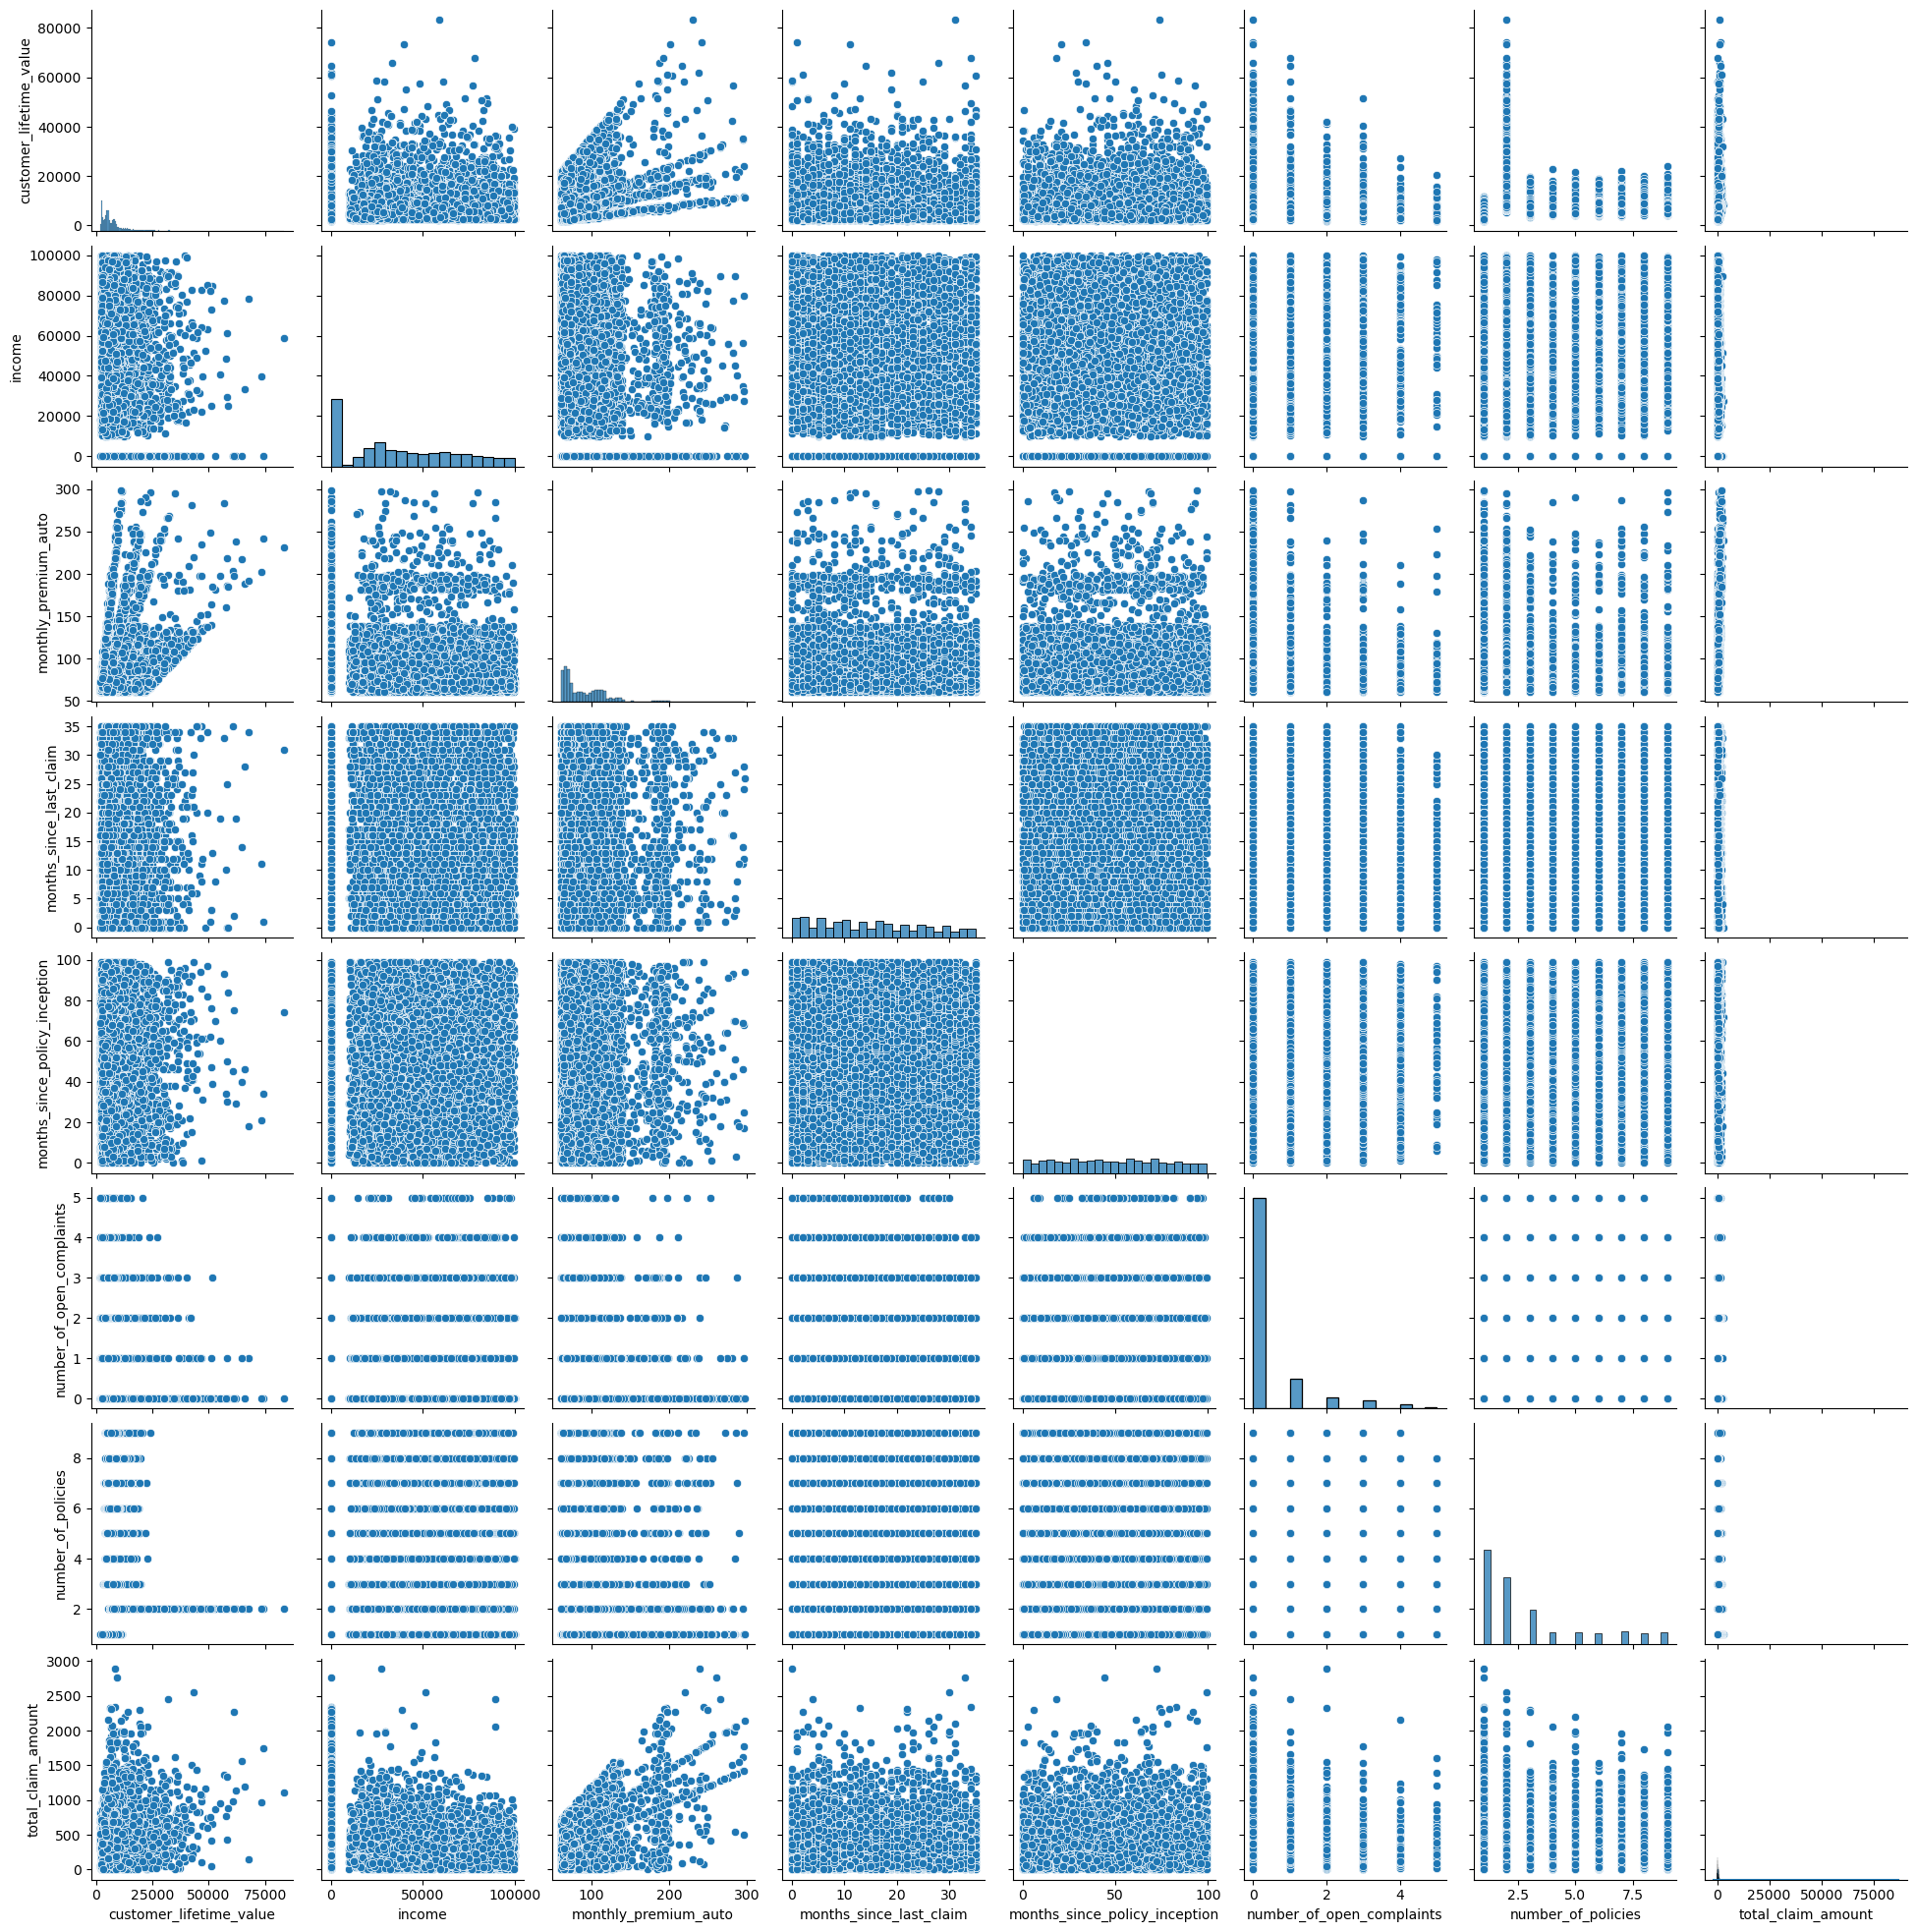

In [31]:
%matplotlib inline
sns.pairplot(data)

sns.distplot(file1['customer_lifetime_value'], bins=10)
plt.show()

## Repeat this for all numerical variables

In [32]:
data.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

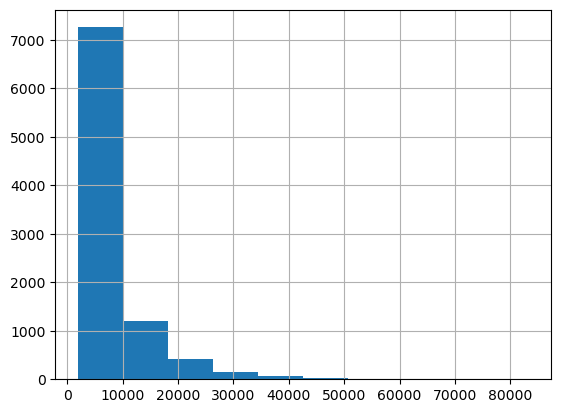

In [33]:
data['customer_lifetime_value'].hist()
plt.show()


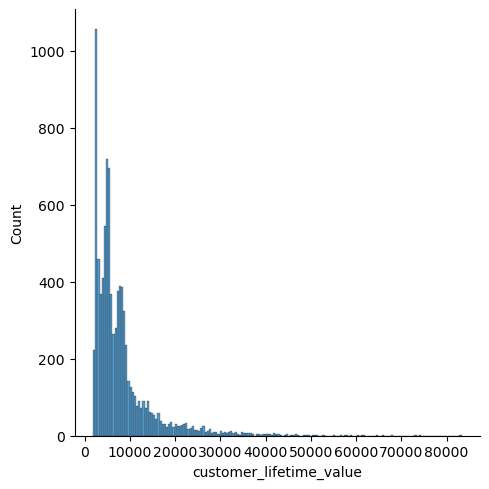

In [34]:
sns.displot(data['customer_lifetime_value'])
plt.show()

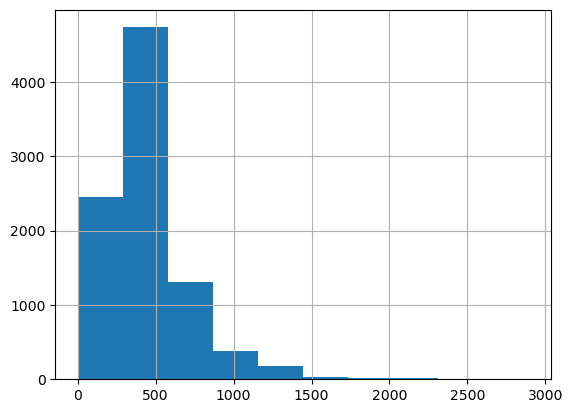

In [35]:
data['total_claim_amount'].hist()
plt.show()


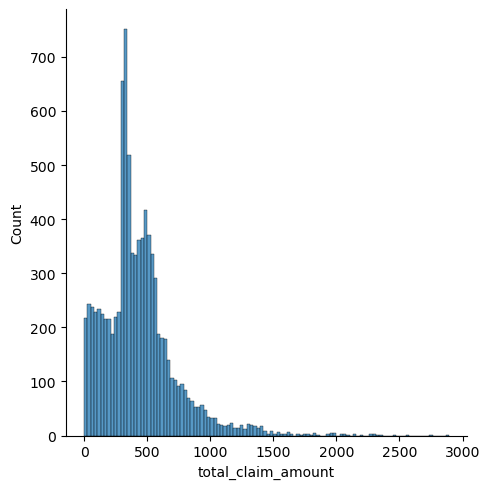

In [36]:
sns.displot(data['total_claim_amount'])
plt.show()

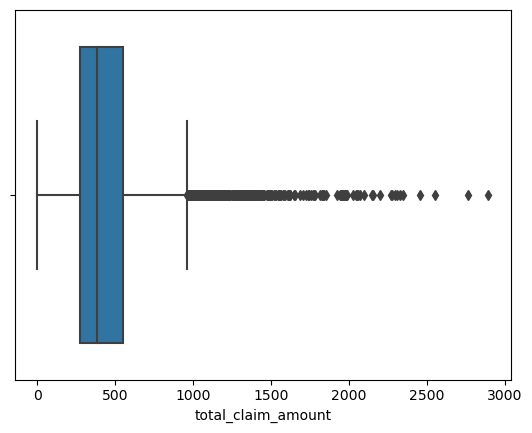

In [37]:
sns.boxplot(x=data['total_claim_amount'])
plt.show()

In [38]:
iqr = np.percentile(data['total_claim_amount'],75) - np.percentile(data['total_claim_amount'],25) #finding the value of box
upper_limit = np.percentile(data['total_claim_amount'],75) + 1.5*iqr
lower_limit = np.percentile(data['total_claim_amount'],25) - 1.5*iqr #

In [39]:
lower_limit 

-140.62664687499995

In [40]:
data.shape

(9134, 8)

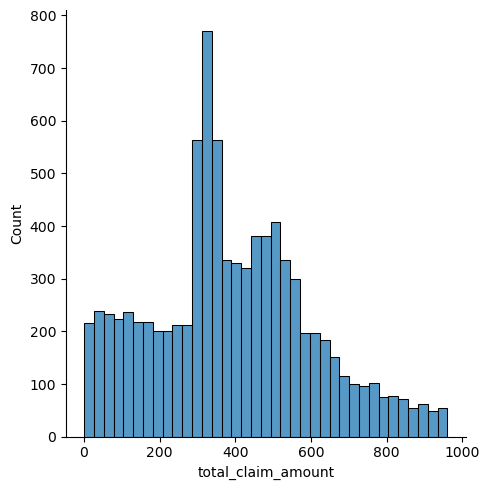

In [41]:
data = data[(data['total_claim_amount']>lower_limit) & (data['total_claim_amount']<upper_limit)] #finding data between lower and heigher values
sns.displot(data['total_claim_amount'])
plt.show()

In [42]:
data.shape

(8681, 8)

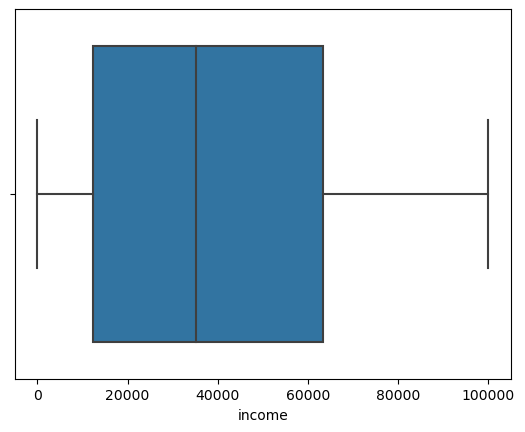

In [43]:
sns.boxplot(x=data['income'])
plt.show()

In [44]:
data['income']

0       56274
2       48767
3           0
4       43836
5       62902
        ...  
9129    71941
9130    21604
9131        0
9132    21941
9133        0
Name: income, Length: 8681, dtype: int64

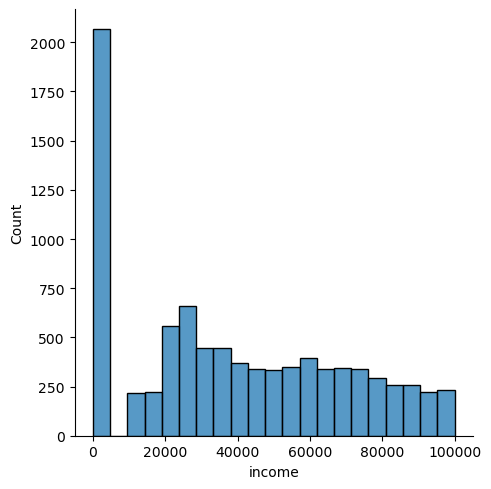

In [45]:
sns.displot(data['income'])
plt.show()

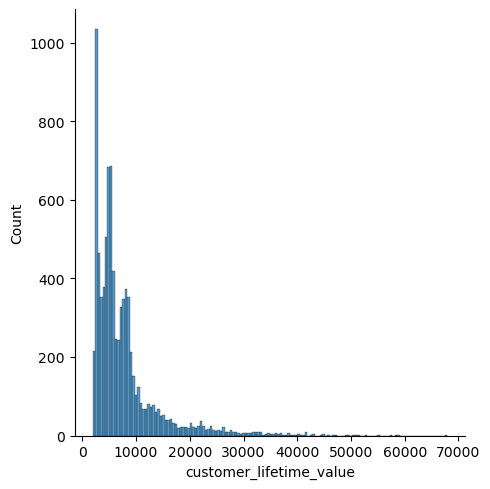

In [46]:
sns.displot(data['customer_lifetime_value'])
plt.show()

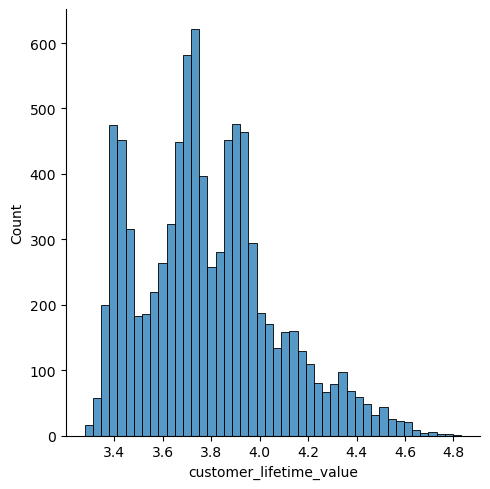

In [47]:

def log_transfom_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

customer_lifetime_value_log = data['customer_lifetime_value'].apply(lambda x :log_transfom_clean1(x))
sns.displot(customer_lifetime_value_log)
plt.show()

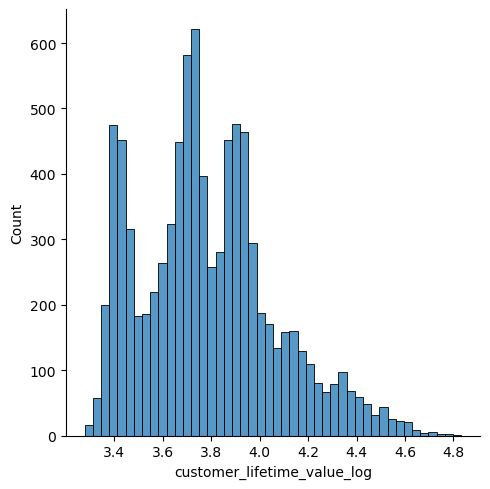

In [48]:
def log_transfom_clean2(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # We are returning NaNs so that we can replace them with means later
data['customer_lifetime_value_log'] = list(map(log_transfom_clean2, data['customer_lifetime_value']))
# Now we replace the NAN by the mean
data['customer_lifetime_value_log'] = data['customer_lifetime_value_log'].fillna(np.mean(data['customer_lifetime_value_log']))
sns.displot(data['customer_lifetime_value_log'])
plt.show()


In [49]:
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
0,2763.519279,56274,69,32,5,0,1,384.811147,3.441462
2,12887.431650,48767,108,18,38,0,2,566.472247,4.110166
3,7645.861827,0,106,18,65,0,7,529.881344,3.883426
4,2813.692575,43836,73,12,44,0,1,138.130879,3.449277
5,8256.297800,62902,69,14,94,0,2,159.383042,3.916785


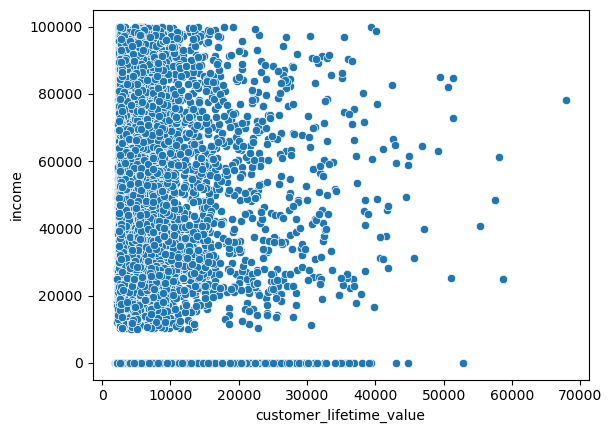

In [50]:
sns.scatterplot(x=data['customer_lifetime_value'], y=data['income'])
plt.show()

In [51]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

y = data['income']
X = data.drop(['income'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [52]:
X_num

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
0,2763.519279,69,32,5,0,1,384.811147,3.441462
2,12887.431650,108,18,38,0,2,566.472247,4.110166
3,7645.861827,106,18,65,0,7,529.881344,3.883426
4,2813.692575,73,12,44,0,1,138.130879,3.449277
5,8256.297800,69,14,94,0,2,159.383042,3.916785
...,...,...,...,...,...,...,...,...
9129,23405.987980,73,18,89,0,2,198.234764,4.369327
9130,3096.511217,79,14,28,0,1,379.200000,3.490873
9131,8163.890428,85,9,37,3,2,790.784983,3.911897
9132,7524.442436,96,34,3,0,3,691.200000,3.876474


In [53]:
X_num.describe()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,7691.288196,89.033061,15.034904,47.966018,0.385555,2.958530,390.034963,3.786705
std,6376.126782,27.095584,10.072207,27.855645,0.912948,2.383001,211.184004,0.277576
min,1898.007675,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,3.278298
25%,3893.305281,68.000000,6.000000,24.000000,0.000000,1.000000,256.438030,3.590318
50%,5635.746396,80.000000,14.000000,48.000000,0.000000,2.000000,364.800000,3.750951
75%,8696.710700,106.000000,23.000000,71.000000,0.000000,4.000000,523.815839,3.939355
max,67907.270500,296.000000,35.000000,99.000000,5.000000,9.000000,960.115399,4.831916


In [54]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns).describe()

(8681, 8)


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,0.087765,0.119290,0.429569,0.484505,0.077111,0.244816,0.406176,0.327240
std,0.096594,0.115300,0.287777,0.281370,0.182590,0.297875,0.219980,0.178664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030228,0.029787,0.171429,0.242424,0.000000,0.000000,0.267015,0.200835
50%,0.056624,0.080851,0.400000,0.484848,0.000000,0.125000,0.379890,0.304228
75%,0.102996,0.191489,0.657143,0.717172,0.000000,0.375000,0.545529,0.425495
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns).describe()

(8681, 8)


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
count,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000
mean,0.087765,0.119290,0.429569,0.484505,0.077111,0.244816,0.406176,0.327240
std,0.096594,0.115300,0.287777,0.281370,0.182590,0.297875,0.219980,0.178664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030228,0.029787,0.171429,0.242424,0.000000,0.000000,0.267015,0.200835
50%,0.056624,0.080851,0.400000,0.484848,0.000000,0.125000,0.379890,0.304228
75%,0.102996,0.191489,0.657143,0.717172,0.000000,0.375000,0.545529,0.425495
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer = MinMaxtransformer.fit(data)

In [57]:
num_normalized = pd.DataFrame(MinMaxtransformer.transform(data), columns=data.columns)
num_normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
0,0.013112,0.562847,0.034043,0.914286,0.050505,0.0,0.000,0.400735,0.105022
1,0.166483,0.487763,0.200000,0.514286,0.383838,0.0,0.125,0.589962,0.535439
2,0.087076,0.000000,0.191489,0.514286,0.656566,0.0,0.750,0.551847,0.389496
3,0.013872,0.438443,0.051064,0.342857,0.444444,0.0,0.000,0.143781,0.110052
4,0.096324,0.629140,0.034043,0.400000,0.949495,0.0,0.125,0.165918,0.410968


In [58]:
# scaling standard scaler: make data distributed with mean=0 and std=1
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns).describe()

(8681, 8)


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
count,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03
mean,-1.573445e-16,1.723269e-16,-5.573496e-17,-4.274122e-17,2.660775e-16,-2.780353e-16,1.548810e-16,1.072802e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.086416e-01,-1.034658e+00,-1.492798e+00,-1.722049e+00,-4.223428e-01,-8.219228e-01,-1.846534e+00,-1.831699e+00
25%,-5.956911e-01,-7.762989e-01,-8.970650e-01,-8.604144e-01,-4.223428e-01,-8.219228e-01,-6.326456e-01,-7.075443e-01
50%,-3.223995e-01,-3.333968e-01,-1.027544e-01,1.220012e-03,-4.223428e-01,-4.022597e-01,-1.194997e-01,-1.288122e-01
75%,1.576945e-01,6.262244e-01,7.908450e-01,8.269530e-01,-4.223428e-01,4.370664e-01,6.335166e-01,5.499725e-01
max,9.444519e+00,7.638841e+00,1.982311e+00,1.832193e+00,5.054738e+00,2.535382e+00,2.699604e+00,3.765712e+00


In [59]:
data2 = file1._get_numeric_data()
data2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [60]:
# Select 3 numeric columns.
df = pd.DataFrame(data=data2)
data2 = df._get_numeric_data().iloc[:,0:3].dropna() # for selecting 3 column with numerical data
data2

,customer_lifetime_value,income,monthly_premium_auto
0,2763.519279,56274,69
1,6979.535903,0,94
2,12887.431650,48767,108
3,7645.861827,0,106
4,2813.692575,43836,73
...,...,...,...
9129,23405.987980,71941,73
9130,3096.511217,21604,79
9131,8163.890428,0,85
9132,7524.442436,21941,96


In [61]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(data2)
x_standardized = transformer.transform(data2)

data2=pd.DataFrame(x_standardized)
data2.head()

,0,1,2
0,0.010629,0.562847,0.033755
1,0.062406,0.000000,0.139241
2,0.134960,0.487763,0.198312
3,0.070589,0.000000,0.189873
4,0.011245,0.438443,0.050633


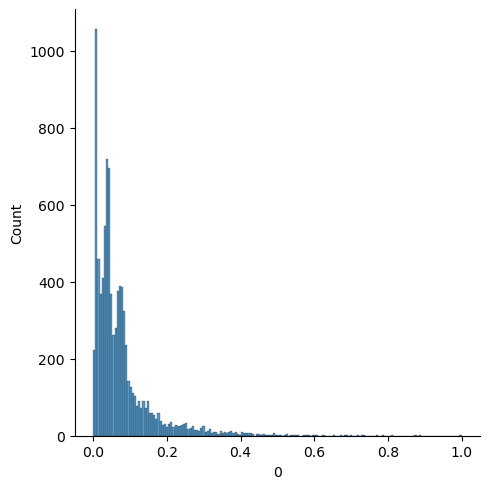

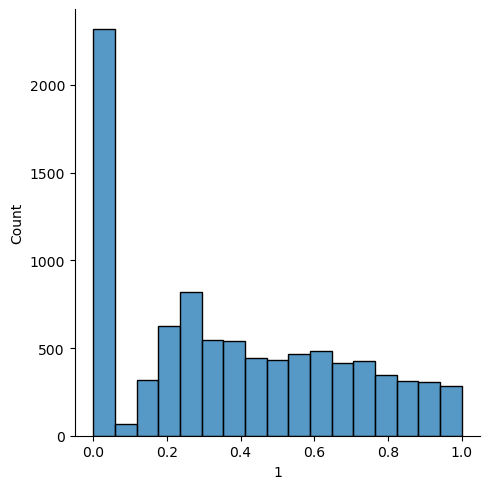

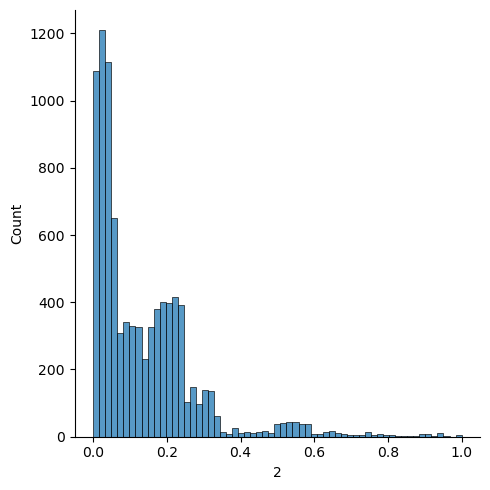

In [62]:
for i in range(3):
    sns.displot(data2.iloc[:,i])
    plt.show()

In [63]:
# scaling standard scaler: make data distributed with mean=0 and std=1
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=X_num.columns).describe()

(8681, 8)


,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
count,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03,8.681000e+03
mean,-1.573445e-16,1.723269e-16,-5.573496e-17,-4.274122e-17,2.660775e-16,-2.780353e-16,1.548810e-16,1.072802e-15
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00
min,-9.086416e-01,-1.034658e+00,-1.492798e+00,-1.722049e+00,-4.223428e-01,-8.219228e-01,-1.846534e+00,-1.831699e+00
25%,-5.956911e-01,-7.762989e-01,-8.970650e-01,-8.604144e-01,-4.223428e-01,-8.219228e-01,-6.326456e-01,-7.075443e-01
50%,-3.223995e-01,-3.333968e-01,-1.027544e-01,1.220012e-03,-4.223428e-01,-4.022597e-01,-1.194997e-01,-1.288122e-01
75%,1.576945e-01,6.262244e-01,7.908450e-01,8.269530e-01,-4.223428e-01,4.370664e-01,6.335166e-01,5.499725e-01
max,9.444519e+00,7.638841e+00,1.982311e+00,1.832193e+00,5.054738e+00,2.535382e+00,2.699604e+00,3.765712e+00


In [64]:
# normalize (standard)
from sklearn.preprocessing import StandardScaler

X_scaled=StandardScaler().fit_transform(X_num)

def normalize(X):
    X_mean=X.mean(axis=0)
    X_std=X.std(axis=0)
    X_std[X_std==0]=1.0
    X=(X-X_mean)/X_std
    return X

X_num=normalize(X_num)
X_num.head()

,customer_lifetime_value,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,customer_lifetime_value_log
0,-0.772847,-0.739348,1.684347,-1.542453,-0.422318,-0.821875,-0.024736,-1.243774
2,0.814937,0.700001,0.294384,-0.357774,-0.422318,-0.402237,0.835467,1.165308
3,-0.007124,0.626188,0.294384,0.611509,-0.422318,1.695958,0.662202,0.348452
4,-0.764978,-0.591722,-0.301315,-0.142378,-0.422318,-0.821875,-1.192818,-1.215623
5,0.088613,-0.739348,-0.102748,1.652591,-0.422318,-0.402237,-1.092185,0.468631


In [65]:
(X_num-X_scaled).sum().sum()  # check difference

9.969773238308749e-11

# LAB CUSTOMER ANALYSIS ROUND 6

In [134]:
file1.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [135]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [136]:
file1.value_counts()

customer  state       customer_lifetime_value  response  coverage  education             effective_to_date  employmentstatus  gender  income  location_code  marital_status  monthly_premium_auto  months_since_last_claim  months_since_policy_inception  number_of_open_complaints  number_of_policies  policy_type     policy        renew_offer_type  sales_channel  total_claim_amount  vehicle_class  vehicle_size
AA10041   California  7901.744238              No        Basic     High School or Below  2/2/11             Unemployed        M       0       Suburban       Single          113                   35                       83                             0                          5                   Personal Auto   Personal L3   Offer1            Call Center    1258.327804         SUV            Medsize         1
RL28880   Nevada      7553.225007              No        Basic     Bachelor              2/12/11            Employed          F       69959   Suburban       Divorced        63  

In [140]:
numerical = file1.select_dtypes(include=np.number)
categorical = file1.select_dtypes(include=np.object)
numerical.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_15172\3581302258.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = file1.select_dtypes(include=np.object)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [141]:
numerical1 = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']]
numerical1

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [142]:
y = numerical1['total_claim_amount']
X = numerical1.drop(['total_claim_amount'],axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [143]:
model = linear_model.LinearRegression()
model = model.fit(X,y)

print(model.intercept_)
print(model.coef_)

72.3909681918401
[-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


In [144]:
model.score(X, y)

0.5186628226558787

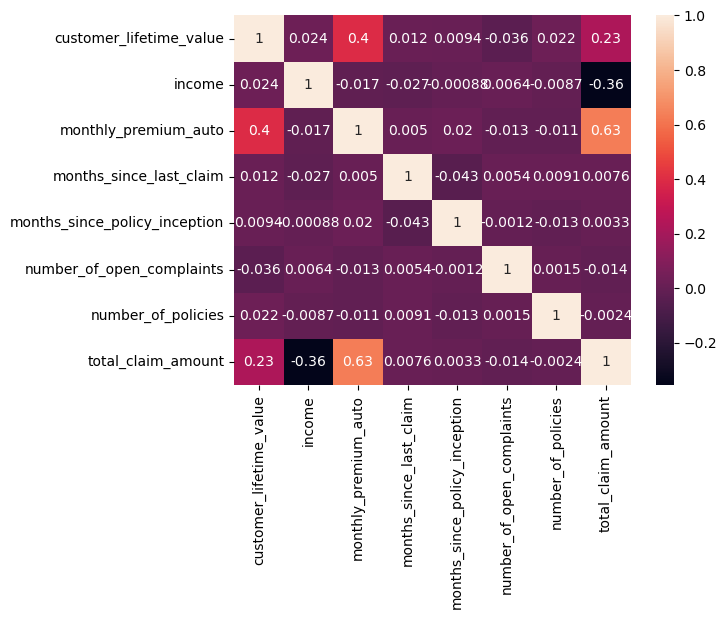

In [145]:
correlations_matrix = numerical1.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [146]:
re_numerical = numerical1.drop(['months_since_last_claim', 'number_of_policies','months_since_policy_inception'],axis=1)
re_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')

In [147]:
y = re_numerical['total_claim_amount']
X = re_numerical.drop(['total_claim_amount'],axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints
0,2763.519279,56274,69,0
1,6979.535903,0,94,0
2,12887.431650,48767,108,0
3,7645.861827,0,106,0
4,2813.692575,43836,73,0
...,...,...,...,...
9129,23405.987980,71941,73,0
9130,3096.511217,21604,79,0
9131,8163.890428,0,85,3
9132,7524.442436,21941,96,0


In [148]:
model = linear_model.LinearRegression()
model = model.fit(X,y)

In [149]:
model.score (X,y)

0.518540490284519

In [150]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer = MinMaxtransformer.fit(numerical1)

In [151]:
num_normalized = pd.DataFrame(MinMaxtransformer.transform(numerical1), columns=numerical1.columns)
num_normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [152]:
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [153]:
model.score (X,y)

0.518540490284519

In [154]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler()
MinMaxtransformer = MinMaxtransformer.fit(numerical1)

In [155]:
num_normalized = pd.DataFrame(MinMaxtransformer.transform(numerical1), columns=numerical1.columns)
num_normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [156]:
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [157]:
categoricals.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [158]:
re_categorical = categoricals[['coverage']]
re_categorical.head()

,coverage
0,Basic
1,Extended
2,Premium
3,Basic
4,Basic


In [159]:
re_categorical.value_counts()

coverage
Basic       5568
Extended    2742
Premium      824
dtype: int64

In [160]:
from sklearn.preprocessing import OneHotEncoder 

encoder = OneHotEncoder().fit(re_categorical)

In [161]:
pd.DataFrame(encoder.transform(re_categorical).toarray(),columns=encoder.categories_)

,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
9129,1.0,0.0,0.0
9130,0.0,1.0,0.0
9131,0.0,1.0,0.0
9132,0.0,1.0,0.0


In [162]:
one_hot_encoded = pd.DataFrame(encoder.transform(re_categorical).toarray(),columns=encoder.categories_).drop(['Premium'],axis=1)
one_hot_encoded.head()

,Basic,Extended
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [163]:
from sklearn.preprocessing import LabelEncoder
label_encoded = LabelEncoder().fit(re_categorical).transform(re_categorical)
label_encoded = pd.DataFrame(label_encoded,columns=re_categorical.columns)
print(label_encoded)
label_encoded.value_counts()

      coverage
0            0
1            1
2            2
3            0
4            0
...        ...
9129         0
9130         1
9131         1
9132         1
9133         1

[9134 rows x 1 columns]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


coverage
0           5568
1           2742
2            824
dtype: int64

In [164]:
X = num_normalized.drop(['total_claim_amount'],axis=1)
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [165]:
X = pd.concat([X,one_hot_encoded],axis=1)

X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,"(Basic,)","(Extended,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0


In [166]:
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [167]:
X.shape

(9134, 9)

In [168]:
# Creating the split between train-test for X and y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=100)

In [169]:
print(X_train.shape)
print(X_test.shape) 
print(y_train.shape)
print(y_test.shape)

(6850, 9)
(2284, 9)
(6850,)
(2284,)


In [170]:
X_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,"(Basic,)","(Extended,)"
3774,0.061906,0.531431,0.126582,0.314286,0.060606,0.0,1.000,0.0,1.0
3441,0.006835,0.000000,0.046414,0.714286,0.040404,0.0,0.000,1.0,0.0
3560,0.024718,0.587242,0.156118,0.228571,0.040404,0.0,0.000,0.0,1.0
6034,0.058228,0.726748,0.092827,0.485714,0.212121,0.2,0.375,0.0,1.0
8904,0.056272,0.188236,0.143460,0.085714,0.515152,0.8,0.875,0.0,1.0


In [171]:
y_train.head()

3774    652.386798
3441    518.400000
3560    470.400000
6034    398.400000
8904    456.000000
Name: total_claim_amount, dtype: float64

In [172]:
X_test.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,"(Basic,)","(Extended,)"
7175,0.039478,0.565978,0.016878,0.114286,0.888889,0.2,0.625,1.0,0.0
7255,0.036650,0.212400,0.261603,0.085714,0.121212,0.0,0.000,0.0,1.0
2846,0.044100,0.338874,0.029536,0.314286,0.838384,0.0,1.000,1.0,0.0
1211,0.022135,0.175603,0.147679,0.171429,0.050505,0.0,0.000,0.0,1.0
4294,0.083287,0.527270,0.202532,0.142857,0.606061,0.0,0.875,0.0,0.0


In [173]:
y_test.head()

7175    312.000000
7255    131.262395
2846     65.659137
1211    666.724937
4294     60.151529
Name: total_claim_amount, dtype: float64

In [174]:
model = linear_model.LinearRegression() 
model = model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [175]:
model.score(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


0.5295445646233699

In [176]:
model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


array([223.48927128, 650.94662689, 315.85937453, ..., 294.34888795,
       154.53203673, 423.76354868])

In [178]:
#R2

from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))
predicted = model.predict(X_test)
r2 = r2_score(y_test, predicted)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [180]:
r2

0.4854075896420059

In [181]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predicted)
print(mse)

41258.01771099323


In [182]:
from sklearn import linear_model
import math

rmse = math.sqrt(mse)
print(rmse)

203.1206973968759


In [183]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predicted)
print('MAE: %.3f' % mae)

MAE: 147.441
